# Statystyczne metody przetwarzania danych 

## Laboratorium 4


### Opis
Celem laboratorium jest przeprowadzenie klasyfikacji z zastosowaniem normalizacji i selekcji cech oraz zapoznanie się z terminem tablicy pomyłek.


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.


**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość).**

Przykład (na podstawie tablicy pomyłek):

**Źle** (nie wiadomo co jest poniżej zaprezentowane, kolumny ani wiersze nie są podpisane, nie wiadomo które z nich prezentują predykcje, a które właściwe etykiety):
```
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
```

### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:

#### A)
* Wczytaj dane.
* Wykonaj klasyfikację za pomocą algorytmu kNN.
* Znajdź optymalne k (sprawdź zakres 3-9).

**UWAGA: Wykorzystaj gotową implementację kNN [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)**



In [7]:
import numpy as np
with open('./dataset/dataset.npz', 'rb') as file:
    data = np.load(file)
    train, test = np.array(data['train']), np.array(data['test'])
print(f'number of train samples: {len(train)}')
print(f'number of test samples: {len(test)}')

number of train samples: 2244
number of test samples: 1496


In [8]:
chosen_classes = [2, 4, 6, 8, 10]
train = train[np.isin(train[:, 0], chosen_classes)]
train_x, train_y = train[:, 2:], train[:, 0]
test = test[np.isin(test[:, 0], chosen_classes)]
test_x, test_y = test[:, 2:], test[:, 0]

In [9]:
from sklearn.neighbors import KNeighborsClassifier

biggest_accuracy = 0
best_k = 0
for k in range(3, 10):
    KNN_classifier = KNeighborsClassifier(n_neighbors=k)
    KNN_classifier.fit(train_x, train_y)
    accuracy = KNN_classifier.score(test_x, test_y)
    if accuracy > biggest_accuracy:
        biggest_accuracy = accuracy
        best_k = k

print(f'best k (range 3-9) is: {best_k}')

best k (range 3-9) is: 3


In [10]:
KNN_classifier = KNeighborsClassifier(n_neighbors=best_k)
KNN_classifier.fit(train_x, train_y)
print(f'accuracy of classification (k = {best_k}) is: {int(round(KNN_classifier.score(test_x, test_y), 2) * 100)}%')

accuracy of classification (k = 3) is: 98%



#### B)
* Znormalizuj dane w zakresie 0-1. Możesz do tego celu wykorzystać gotową funkcję z biblioteki scikit-learn https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html.
    **Ważne: współczynniki powinny być obliczone na zbiorze treningowym i te same powinny zostać zastosowane do normalizacji zbioru testowego.**
* Ponownie wykonaj klasyfikację z tymi samymi parametrami, ale na danych znormalizowanych.



In [11]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
normalizer.fit(train_x)

normalized_train_x = normalizer.transform(train_x)
normalized_test_x = normalizer.transform(test_x)

KNN_classifier.fit(normalized_train_x, train_y)
print(f'accuracy of classification for normalized data is: {int(round(KNN_classifier.score(normalized_test_x, test_y), 2) * 100)}%')

accuracy of classification for normalized data is: 96%


#### C)
* Przeprowadź selekcję cech (wykonaj dla 2, 5 i 10 cech). Skorzystaj z biblioteki [scikit-learn](https://scikit-learn.org/stable/modules/feature_selection.html) (np. [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)).




In [12]:
from sklearn.feature_selection import SelectKBest

print('best 2 features:')
feature_selector = SelectKBest(k=2).fit(normalized_train_x, train_y)
print(feature_selector.get_feature_names_out([i for i in range(3, 17)]))
limited_train_x_2 = feature_selector.transform(normalized_train_x)
limited_test_x_2 = feature_selector.transform(normalized_test_x)
print()

print('best 5 features:')
feature_selector = SelectKBest(k=5).fit(normalized_train_x, train_y)
print(feature_selector.get_feature_names_out([i for i in range(3, 17)]))
limited_train_x_5 = feature_selector.transform(normalized_train_x)
limited_test_x_5 = feature_selector.transform(normalized_test_x)
print()

print('best 10 features:')
feature_selector = SelectKBest(k=10).fit(normalized_train_x, train_y)
print(feature_selector.get_feature_names_out([i for i in range(3, 17)]))
limited_train_x_10 = feature_selector.transform(normalized_train_x)
limited_test_x_10 = feature_selector.transform(normalized_test_x)
print()

best 2 features:
[4 9]

best 5 features:
[4 5 8 9 10]

best 10 features:
[3 4 5 8 9 10 11 12 13 16]



#### D)
* Wyświetl tablicę pomyłek (*confusion matrix*). W tym przypadku możesz zastosować gotową implementację z biblioteki `scikit-learn` <https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html>.
* Opisz wyniki i napisz wnioski.

confusion matrix for 2 features:
accuracy: 98%


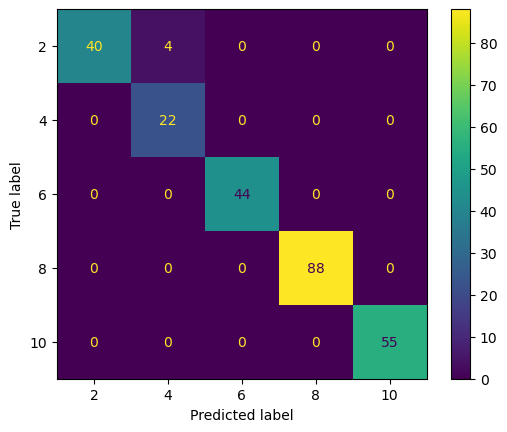


confusion matrix for 5 features:
accuracy: 99%


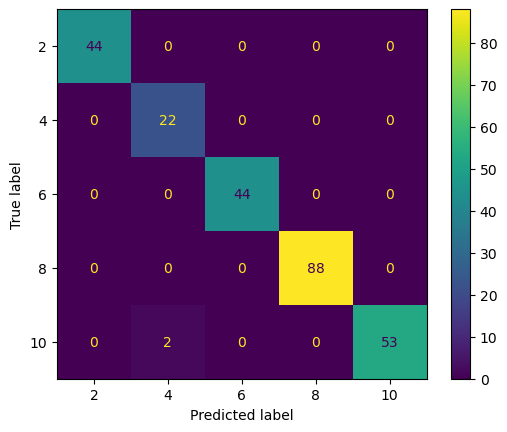


confusion matrix for 10 features:
accuracy: 98%


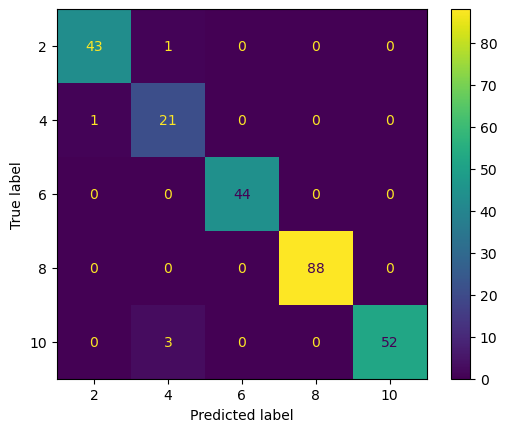

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def display_confusion_matrix(train_x, train_y, test_x, test_y):
    KNN_classifier = KNeighborsClassifier(n_neighbors=best_k)
    KNN_classifier.fit(train_x, train_y)
    predictions = KNN_classifier.predict(test_x)
    print(f'accuracy: {int(round(KNN_classifier.score(test_x, test_y), 2) * 100)}%')
    confusion_matrix_plot = ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix(test_y, predictions),
        display_labels=chosen_classes
    )
    confusion_matrix_plot.plot()
    plt.show()
    print()

print('confusion matrix for 2 features:')
display_confusion_matrix(limited_train_x_2, train_y, limited_test_x_2, test_y)
print('confusion matrix for 5 features:')
display_confusion_matrix(limited_train_x_5, train_y, limited_test_x_5, test_y)
print('confusion matrix for 10 features:')

display_confusion_matrix(limited_train_x_10, train_y, limited_test_x_10, test_y)

In [ ]:
"""

WNIOSKI

Normalizacja danych w większości przypadków znacznie zwiększa dokładność klasyfikacji.
Przy moich wybranych klasach (2, 4, 6, 8, 10) minimalnie ją zmniejsza,
ale dokładnośc klasyfikacji nadal jest bardzo wysoka (96%).

Jeżeli chodzi o wybór ilości porównywanych cech, w większości przypadków
zwiększenie ilości wybranych cech zwiększa dokładność klasyfikacji,
ale dokładność klasyfikacji jest bardzo porównywalna przy 2, 10, czy
wszystkich cechach. Przy moich wybranych klasach, najlepsza dokładność
jest przy wyborze 5 cech.

"""